## hady hisham zaher 

In [1]:
# conventional way to import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
from datetime import datetime

## Read dataset

In [7]:
data = pd.read_csv("Task-2.csv")

## examine the first 5 rows

In [10]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store


## info about data 

In [11]:
data.shape

(9648, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9641 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9646 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Sales Method      9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


## use your power and techniques to clean and process data 

- replace non relevant characters 
- handle nan values 
- handle missing values  
- handle outliers 
- handle date and time 
- drop non relevant columns
- try to extract relational features.

## nan values

In [17]:
data = data.dropna()

In [18]:
data.shape

(9639, 12)

## non relevant columns

In [19]:
data.drop('Retailer ID', inplace=True, axis=1)

## date handling

In [20]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

## non relevant characters

In [21]:
data['Price per Unit'] = data['Price per Unit'].str.replace("$", "", regex=False)
data['Price per Unit'] = data['Price per Unit'].str.replace(".", "", regex=False).astype('int')

In [22]:
data['Price per Unit'] = data['Price per Unit'].apply(lambda x: x / 100)

In [23]:
data['Units Sold'] = data['Units Sold'].str.replace(",", "", regex=False).astype('int')

In [24]:
data['Operating Profit'] = data['Operating Profit'].str.replace("$", "", regex=False)
data['Operating Profit'] = data['Operating Profit'].str.replace(",", "", regex=False).astype('int')

In [48]:
data['Total Sales'] = data['Total Sales'].str.replace(',', '')
data['Total Sales'] = data['Total Sales'].astype('int')

In [49]:
data.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store


## outliners

<AxesSubplot:xlabel='Price per Unit'>

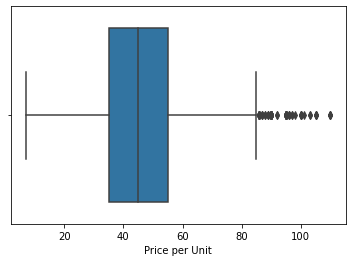

In [27]:
sns.boxplot(x='Price per Unit',data=data)

<AxesSubplot:xlabel='Price per Unit'>

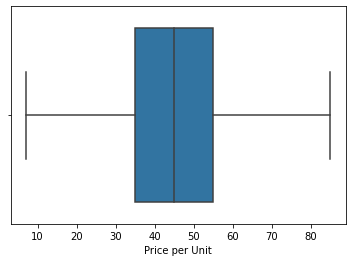

In [29]:
ppu = data[data['Price per Unit'] < 86]
sns.boxplot(x='Price per Unit',data=ppu)
# I got the 86 by trial and error 

<AxesSubplot:xlabel='Units Sold'>

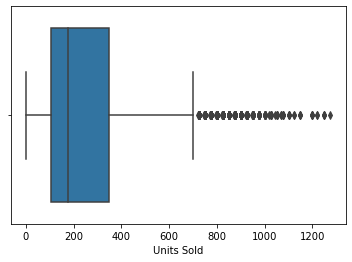

In [30]:
sns.boxplot(x='Units Sold',data=data)

<AxesSubplot:xlabel='Units Sold'>

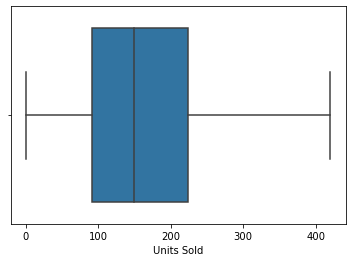

In [46]:
us = data[data['Units Sold'] < 425]
sns.boxplot(x='Units Sold',data=us)

<AxesSubplot:xlabel='Total Sales'>

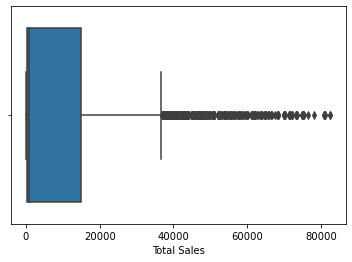

In [50]:
sns.boxplot(x='Total Sales',data=data)

<AxesSubplot:xlabel='Total Sales'>

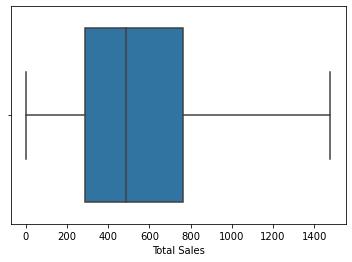

In [68]:
ts = data[data['Total Sales'] < 1485]
sns.boxplot(x='Total Sales',data=ts)

<AxesSubplot:xlabel='Operating Profit'>

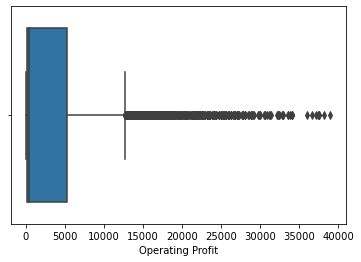

In [69]:
sns.boxplot(x='Operating Profit',data=data)

<AxesSubplot:xlabel='Operating Profit'>

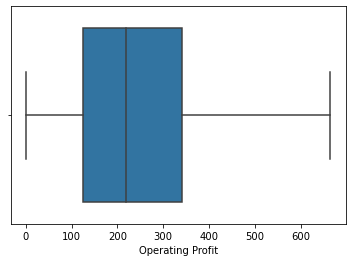

In [83]:
op = data[data['Operating Profit'] < 666]
sns.boxplot(x='Operating Profit',data=op)

### I need form you to give me a dataframe with only values like New York from State column 

In [84]:
data_new = data[data.State.isin(['New York'])]

In [85]:
data_new.shape

(359, 11)

## is there any relation between year and Total Sales ?

In [86]:
data['Year'] = data['Invoice Date'].dt.year 

<AxesSubplot:xlabel='Year', ylabel='Total Sales'>

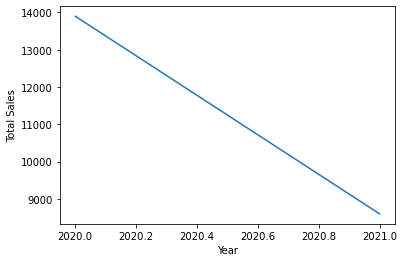

In [87]:
sns.lineplot(x='Year',
            y='Total Sales',
            data=data,
             ci=None)

## is there any relation between month and Total Sales ?

In [88]:
data['Month'] = data['Invoice Date'].dt.month

<AxesSubplot:xlabel='Month', ylabel='Total Sales'>

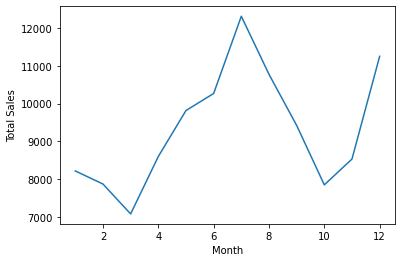

In [89]:
sns.lineplot(x='Month',
            y='Total Sales',
            data=data,
             ci=None)

## is there any core relation between your features ?

<AxesSubplot:>

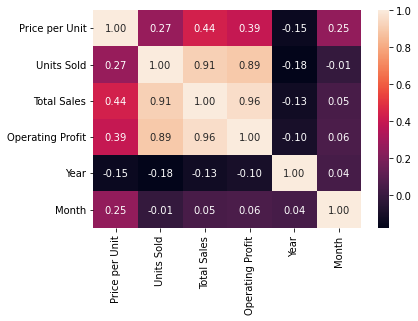

In [90]:
sns.heatmap(data.corr(),
            annot = True,
            fmt='.2f')

## What is the highest product count in Retailer column ????

In [91]:
data.groupby('Retailer').Product.value_counts().idxmax()

('Foot Locker', "Men's Street Footwear")

## What is the highest product with Total Sales ?

In [92]:
data.groupby('Product')['Total Sales'].sum().idxmax()

"Men's Street Footwear"

## If there any problem with Price per Unit column ?, if not please visualize the distribution of it.

<AxesSubplot:xlabel='Price per Unit', ylabel='Count'>

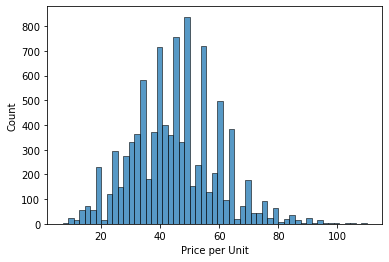

In [93]:
sns.histplot(x = 'Price per Unit',
            data = data)

### Give me the Total Sales for Northeast only in one chart!

In [95]:
data_northeast = data[data['Region'] == 'Northeast']

<AxesSubplot:ylabel='Total Sales'>

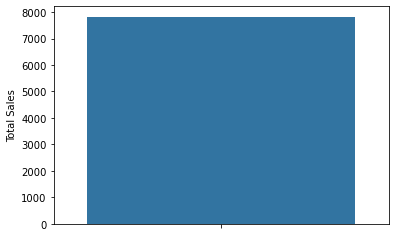

In [96]:
sns.barplot(y = 'Total Sales',
           data = data_northeast,
            ci=None)

### What is the highest Sales Method with total sales?


In [97]:
data.groupby('Sales Method')['Total Sales'].sum()

Sales Method
In-store    35664375
Online      24767439
Outlet      29317253
Name: Total Sales, dtype: int32

In [98]:
data.groupby('Sales Method')['Total Sales'].sum().idxmax()

'In-store'

### What is the highest Sales Method in South region ?


In [99]:
data_south = data[data['Region'] == 'South']

In [100]:
data_south['Sales Method'].value_counts().idxmax()

'Outlet'

## Thank for your effort! i hope the best for you.